# Análise Dinâmica de um Pêndulo 

Vamos considerar o pêndulo simples da figura abaixo 
<img src="pendulo.jpg" style="float: center;" alt="A pictogram of a blood bag with blood donation written in it" width="250"/>

sendo $\ell = 1$ m, $m=1$ kg sobre ação de um campo gravitacional, $g=9,8$ m/s$^2$. Sabemos que a lagrangiana $\mathcal{L}$ será dada por:

\begin{equation}
\mathcal L = T(\dot\theta)-V(\theta) = \frac{1}{2}m\ell^2\dot{\theta}^2 - mg\ell\left(1-\cos\theta\right)
\end{equation}

sendo $T$ e $V$ a energia cinética e potencial, respectivamente. O momento canônico associado a coordenada generalizada $\theta$ é calculado como:

\begin{equation}
p = \frac{\partial \mathcal L}{\partial \dot\theta} = m\ell^2\dot \theta \quad \rightarrow \quad \dot \theta = \frac{p}{m\ell^2}
\end{equation}

Com isto, podemos facilmente calcular a transformada de Legendre da Lagrangiana, obtendo a Hamiltonina, que pode ser parametrizada em função de $\theta$ e $p$:

\begin{equation}
\mathcal H(\theta, p) = p\dot\theta -\mathcal L = \frac{p^2}{m\ell^2}+mg\ell(1-\cos\theta)
\end{equation}

$\theta$ e $p$ definem o espaço de fases. Aplicando as equações de Hamilton:

\begin{eqnarray}
\begin{array}{ccc}
\dot\theta = \frac{\partial H}{\partial p} &=&\frac{p}{m\ell^2}\\
\dot p = -\frac{\partial H}{\partial\theta} &=& -mg\ell\sin\theta
\end{array}
\end{eqnarray}

Definindo a frequência natural $\omega^2 = \frac{g}{\ell}$, podemos parametrizar estas equações como:

\begin{equation}
\left\{\begin{array}{c}
\dot\theta\\
\dot p
\end{array}\right\} = \left\{\begin{array}{c}
\frac{p}{m\ell^2}\\
-m\ell^2\omega^2\sin\theta
\end{array}
\right\} \quad \rightarrow \quad \mathbf{\dot z} = \mathcal F(\mathbf z)
\end{equation}

$\mathbf z$ é o vetor no espaço de fases. Observamos também que as equações estão na forma de um sistema de primeira ordem. 

Ilustraremos na sequência como obter integrar e analisar estas equações de movimento, primeiro para o caso livre e sem amortecimento.

# Pêndulo livre sem amortecimento

Primeiro vamos carregar as bibliotecas necessárias.

In [97]:
import numpy as np
import pandas as pd
import math as mt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '15'})
rc('text', usetex=True)

Definindo os parâmetros da simulação

In [98]:
l,m,g = 1 ,1,9.81
omega= np.sqrt(g/l)
N = 1000  # numero de amostras para simular
t = np.linspace(0,20,N)   # vetor tempo

# z é o vetor no espaço de fases com z =[theta,p]
def pendulo(z,t,l,m,g,omega):
    theta = z[0]
    p = z[1]
    dot_theta = p/(m*(l**2))
    dot_p = -m*(l**2)*(omega**2)*mt.sin(theta)
    dot_z = [dot_theta,dot_p]
    return dot_z

# Solução numérica

Integrando numericamente usando Runge-Kutta de quarta ordem para uma condição inicial:

In [99]:
theta0 = -np.pi/4   # condição inicial theta
p0 = 3   # condição inicial para p
z0 = [theta0,p0]
z = odeint(pendulo,z0,t,args=(l,m,g,omega))
#z=np.array(z)
#print(z)
#print(z.shape) Ver dimensão e tamanho

Visualizando o a evolução temporal do deslocamento angular $\theta$:

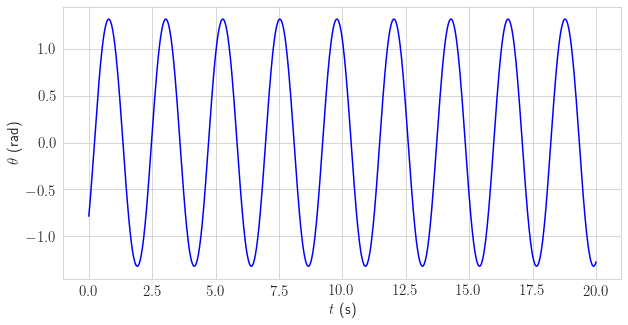

In [100]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid") #darkgrid
plt.plot(t,z[:,0],color = 'b')
plt.ylabel(r"$\theta$ (rad)" )
plt.xlabel("$t$ (s)");
#plt.savefig('FS.eps', format='eps')
plt.savefig('theta.pdf')
plt.show()

Visualizando o espaço de fases:

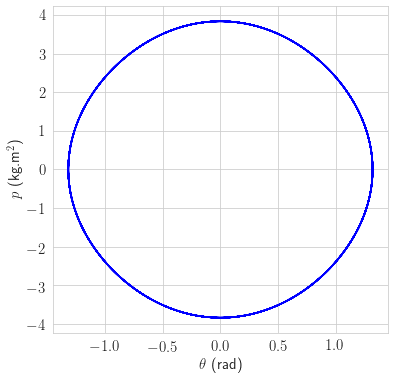

In [101]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid") #darkgrid
plt.plot(z[:,0],z[:,1],color = 'b')
plt.xlabel(r"$\theta$ (rad)" )
plt.ylabel("$p$ (kg.m$^2$)");
#plt.savefig('FS.eps', format='eps')
plt.savefig('theta_p.pdf')
#ax = plt.gca()
#ax.set_xlim([-2*np.pi, 2*np.pi])
#ax.set_ylim([-5, 5])
plt.show()

Interessante integrar para várias condições iniciais, em especial quando $\theta$ ultrapassa $\pi$, para verificar as diferenças entre as variabilidades (manifolds) possíveis, abertos e fechados e ver a linha separatriz; limitando a visualização entre $-\pi<\theta<\pi$. Também é interessante analisar e verificar que a Hamiltoniana $\mathcal H(q,p)$ é constante, indicando conservação da energia.

In [102]:
z0 = [-np.pi/4,0]
z1 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [-np.pi/2,2]
z2 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [np.pi,0]
z3 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [np.pi,-2]
z4 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [-np.pi,2]
z5 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [-np.pi,0]
z6 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [-np.pi,0]
z7 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [-np.pi,4]
z7 = odeint(pendulo,z0,t,args=(l,m,g,omega))

z0 = [np.pi,-4]
z8 = odeint(pendulo,z0,t,args=(l,m,g,omega))  

Visualizando as linhas de campo no espaço de fases:

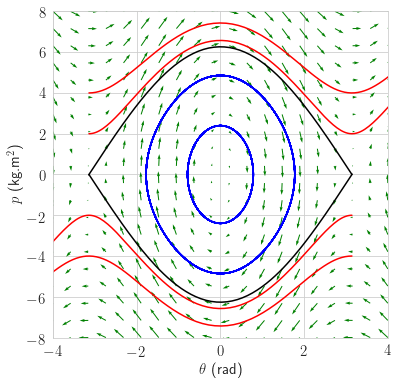

In [103]:
# gerando as linhas de campo
ny = 20

def f(Y, t0):
    y1, y2 = Y
    return [y2/(m*(l**2)), -m*(l**2)*(omega**2)*mt.sin(y1)]

y1 = np.linspace(-4, 4, ny)
y2 = np.linspace(-8, 8, ny)
Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

t0=0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t0)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     
# verificando o espaço de fases
plt.figure(figsize=(6,6))
sns.set_style("whitegrid") #darkgrid
plt.quiver(Y1, Y2, u, v, color='g')
plt.plot(z1[:,0],z1[:,1],color = 'b')
plt.plot(z2[:,0],z2[:,1],color = 'b')
plt.plot(z3[:,0],z3[:,1],color = 'k')
plt.plot(z4[:,0],z4[:,1],color = 'r')
plt.plot(z5[:,0],z5[:,1],color = 'r')
plt.plot(z6[:,0],z6[:,1],color = 'k')
plt.plot(z7[:,0],z7[:,1],color = 'r')
plt.plot(z8[:,0],z8[:,1],color = 'r')

plt.xlabel(r"$\theta$ (rad)" )
plt.ylabel("$p$ (kg.m$^2$)");
#plt.savefig('FS.eps', format='eps')
ax = plt.gca()
ax.set_xlim([-4,4])
ax.set_ylim([-8, 8])
plt.savefig('manifold.pdf')
plt.show()

## Pêndulo livre amortecido

Vamos assumir agora um pêqueno amortecimento viscoso $\alpha$ presente. Neste caso o pêndulo ira dissipar energia, quebrando a conservação da Hamiltoniana. Isto era gerar no espaço de fase, uma bacia de atração. Assim:

\begin{equation}
\left\{\begin{array}{c}
\dot\theta\\
\dot p
\end{array}\right\} = \left\{\begin{array}{c}
\frac{p}{m\ell^2}\\
-m\ell^2\omega^2\sin\theta - \alpha\frac{p}{m\ell^2}
\end{array}
\right\} 
\end{equation}

que são as equações que serão resolvidas. Os passos são iguais aos anteriores, apenas com a definição de uma nova função para incluir o amortecimento.

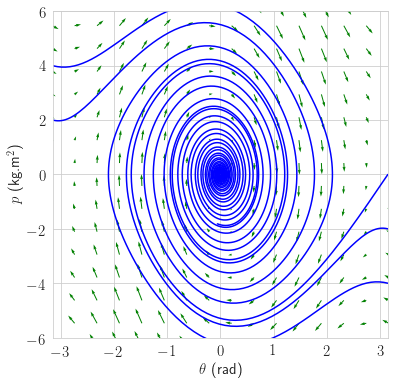

In [104]:
alpha = 0.5

# z é o vetor no espaço de fases com z =[theta,p]
def penduloamort(z,t,l,m,g,omega,alpha):
    theta = z[0]
    p = z[1]
    dot_theta = p/(m*(l**2))
    dot_p = -m*(l**2)*(omega**2)*mt.sin(theta)-alpha*dot_theta
    dot_z = [dot_theta,dot_p]
    return dot_z

# Resolver a equação de movimento para várias condições iniciais
z0 = [np.pi,0]
z1 = odeint(penduloamort,z0,t,args=(l,m,g,omega,alpha))

z0 = [np.pi,-2]
z2 = odeint(penduloamort,z0,t,args=(l,m,g,omega,alpha))

z0 = [-np.pi,2]
z3 = odeint(penduloamort,z0,t,args=(l,m,g,omega,alpha))

z0 = [-np.pi,4]
z4 = odeint(penduloamort,z0,t,args=(l,m,g,omega,alpha))

z0 = [np.pi,-4]
z5 = odeint(penduloamort,z0,t,args=(l,m,g,omega,alpha))

############################################################
# linhas de campo para esta situação
ny = 20

def f1(Y, t0):
    y1, y2 = Y
    return [y2/(m*(l**2)), -m*(l**2)*(omega**2)*mt.sin(y1)-alpha*y2/(m*(l**2))]

y1 = np.linspace(-4, 4, ny)
y2 = np.linspace(-8, 8, ny)
Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

t0=0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f1([x, y], t0)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
############################################################
plt.figure(figsize=(6,6))
sns.set_style("whitegrid") #darkgrid
plt.quiver(Y1, Y2, u, v, color='g')

plt.plot(z1[:,0],z1[:,1],color = 'b')
plt.plot(z2[:,0],z2[:,1],color = 'b')
plt.plot(z3[:,0],z3[:,1],color = 'b')
plt.plot(z4[:,0],z4[:,1],color = 'b')
plt.plot(z5[:,0],z5[:,1],color = 'b')
plt.xlabel(r"$\theta$ (rad)" )
plt.ylabel("$p$ (kg.m$^2$)");
#plt.savefig('FS.eps', format='eps')
ax = plt.gca()
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([-6, 6])
plt.savefig('manifold_amort.pdf')
plt.show()
    

# Pêndulo forçado

Vamos assumir que o pêndulo é forçado com um esforço dado por $A\sin(\Omega t)$. A amplitude $A$ pode variar dependendo do teste; já a frequência de excitação é considerada no primeiro teste como $\Omega = \frac{2}{3}$ rad/s, assim:

\begin{equation}
\left\{\begin{array}{c}
\dot\theta\\
\dot p
\end{array}\right\} = \left\{\begin{array}{c}
\frac{p}{m\ell^2}\\
A\sin(\Omega t)-m\ell^2\omega^2\sin\theta - \alpha\frac{p}{m\ell^2}
\end{array}
\right\} 
\end{equation}

Vamos definir esta nova equação de movimento:

In [105]:
A = 0.5
W = 2/3
N = 150000  # numero de amostras para simular
t = np.linspace(0,15000,N)   # vetor tempo

alpha=0.5;
omega=1;

# z é o vetor no espaço de fases com z =[theta,p]
def pendulofor(z,t,l,m,g,omega,alpha,A,W):
    theta = z[0]
    p = z[1]
    dot_theta = p/(m*(l**2))
    dot_p = A*mt.sin(W*t) -m*(l**2)*(omega**2)*mt.sin(theta)-alpha*dot_theta
    dot_z = [dot_theta,dot_p]
    return dot_z

Vamos analisar a integração das equações de movimento em duas condições iniciais próximas. 

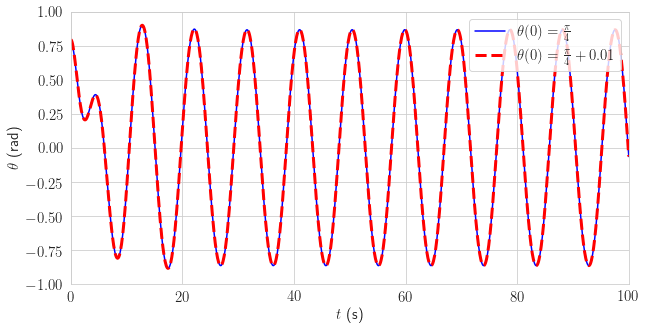

In [106]:
p0 = 0
theta01 = np.pi/4
z01=[theta01,p0]
zsc1 = odeint(pendulofor,z01,t,args=(l,m,g,omega,alpha,A,W))

theta02 = np.pi/4+0.01
z02=[theta02,p0]
zsc2 = odeint(pendulofor,z02,t,args=(l,m,g,omega,alpha,A,W))

plt.figure(figsize=(10,5))
sns.set_style("whitegrid") #darkgrid
plt.plot(t,zsc1[:,0],label = r"$\theta(0)=\frac{\pi}{4}$",color = 'b')
plt.plot(t,zsc2[:,0],label =r"$\theta(0)=\frac{\pi}{4}+0.01$",color = 'r',linestyle='dashed',linewidth=3)
plt.ylabel(r"$\theta$ (rad)" )
plt.xlabel("$t$ (s)");
#plt.savefig('FS.eps', format='eps')
ax = plt.gca()
ax.set_xlim([0 ,100])
ax.set_ylim([-1, 1])
plt.legend(loc='upper right')
plt.savefig('sem_caos.pdf')
plt.show()

Percebe-se que para estas duas condições iniciais, o pêndulo responde da mesma forma, e não verificamos caos. 

# Efeito borboleta

Vamos aumentar um pouco a amplitude da força de excitação e aplicar as mesmas condições iniciais do caso anterior, para ver o que acontece.

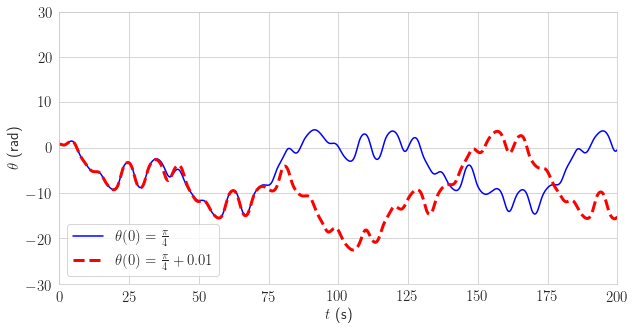

In [107]:
A=1.2;

zc1 = odeint(pendulofor,z01,t,args=(l,m,g,omega,alpha,A,W))
zc2 = odeint(pendulofor,z02,t,args=(l,m,g,omega,alpha,A,W))

plt.figure(figsize=(10,5))
sns.set_style("whitegrid") #darkgrid
plt.plot(t,zc1[:,0],label = r"$\theta(0)=\frac{\pi}{4}$",color = 'b')
plt.plot(t,zc2[:,0],label =r"$\theta(0)=\frac{\pi}{4}+0.01$",color = 'r',linestyle='dashed',linewidth=3)
plt.ylabel(r"$\theta$ (rad)" )
plt.xlabel("$t$ (s)");
#plt.savefig('FS.eps', format='eps')
ax = plt.gca()
ax.set_xlim([0 ,200])
ax.set_ylim([-30, 30])
plt.legend(loc='lower left')
plt.minorticks_on()
plt.savefig('com_caos.pdf')
plt.show()

Para esta amplitude de excitação $A$ acontece um efeito bem interessante, onde percebemos que pequenas perturbações nas condições iniciais geram trajetórias bem distintas. Este efeito é conhecido como **efeito borboleta**, sendo um indício de comportamento caótica.

# Expoente de Lyapunov

* Uma forma bastante efetiva de comprovar que um sistema possui comportamento caótico é estimando os expoentes de Lyapunov.
* A principal característica da manifestação de caos em sistemas dinâmicos é a enorme sensibilidade a variações minímas nas condições iniciais.
* Podemos tirar conclusões sobre isto a partir da verificação da diferença de duas respostas com condições iniciais bem próximas, analisando:
$$\Delta \theta = \theta(t) -\hat{\theta}(t)$$
* Se aproximarmos os picos desta diferença por:
$$ \Delta \theta \approx \exp(\lambda t) \quad \rightarrow \quad \lambda = \frac{\ln(\Delta \theta)}{\Delta t}$$
* Quando temos um movimento regular, i.e., **sem caos**, ao longo do tempo a diferença entre $\theta(t)$ e $\hat{\theta}(t)$ vai decaindo, indicando que $\lambda<0$.
* Agora se a diferença entre as duas trajetórias for aumentando ao longo do tempo, indica que $\lambda>0$, caracterizando a presença de **caos**

In [108]:
# converte ângulo no intervalo de -pi até pi
def normaliza_angulo(z):
    theta1 = np.mod(z[:,0]+np.pi, 2* np.pi)-np.pi 
    return np.array(theta1)

def expoente_lyapunov(z1,z2,t,A):
    dt = t[1]
    theta1 = z1
    theta2 = z2  
    dTheta = theta1-theta2
    lamb = np.log(dTheta)/dt
    
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid") #darkgrid
    plt.plot(t,lamb,color = 'b')
    plt.title('$A={}$'.format(A))
    plt.ylabel(r"$\lambda$" )
    plt.xlabel("$t$ (s)");
    ax = plt.gca()
    ax.set_xlim([0 ,700])
    return    plt.show() 


Para o pêndulo forçado, observa-se:
* A resposta $\theta(t)$ é **previsível** para $A=0.5$, i.e., $\lambda<0$
* A resposta $\theta(t)$ é **imprevisível** quando $A=1.2$, i.e., $\lambda>0$

<ipython-input-108-52aacdd0f316>:11: RuntimeWarning: invalid value encountered in log
  lamb = np.log(dTheta)/dt


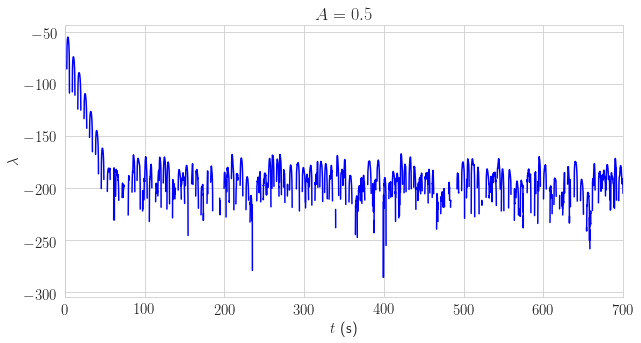

<ipython-input-108-52aacdd0f316>:11: RuntimeWarning: invalid value encountered in log
  lamb = np.log(dTheta)/dt


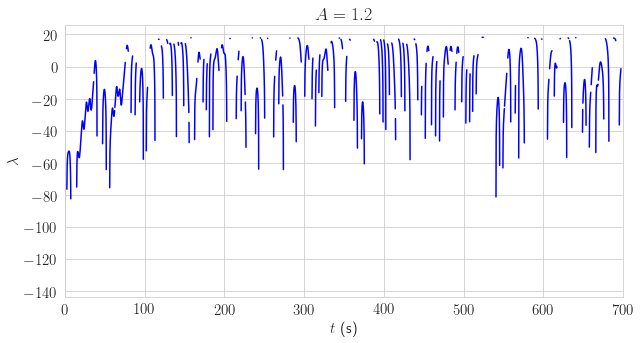

In [109]:
theta_sc = normaliza_angulo(zsc1)
theta_chapeu_sc = normaliza_angulo(zsc2)
expoente_lyapunov(theta_sc,theta_chapeu_sc,t,0.5)

theta_c = normaliza_angulo(zc1)
theta_chapeu_c = normaliza_angulo(zc2)
expoente_lyapunov(theta_c,theta_chapeu_c,t,1.2)


O método apresentado aqui é bem rudimentar, outros métodos mais efetivos podem ser estudados, como o método de Wolf ou o teste 0-1.

# Seção de Poincaré

* O espaço de fases $\theta$ versus $p$ é mais fácil de analisar quando estão em fase com a frequência de excitação $\Omega$, i.e, quando:
$$\Omega t = 2n \pi \quad \rightarrow \quad \left |t - \frac{2n\pi}{\Omega}\right| <\Delta t$$
* Esta situação é como se utilizassemos uma luz estroboscópica apra sincronizar o efeito de interesse após o regime transiente, representanto apenas alguns pontos específicos.
* No geral, vários ciclos precisam ocorrer para traçar corretamente este mapa, sendo assim precisamos utilizar muitas amostras e um tempo de simulação suficientemente grande.
* As secções de Poincaré permitem uma caracterização mais interessante para o comportamento do sistema.
* Atratores que aparecem quando sistemas dinâmicos apresentam caos possuem dimensão fractal.

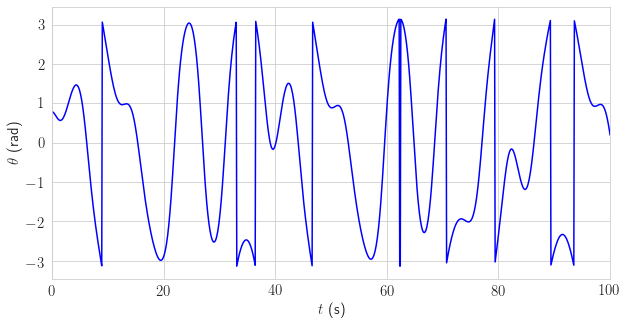

In [110]:
theta1=normaliza_angulo(zc1)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid") #darkgrid
plt.plot(t,theta1,color = 'b')
plt.ylabel(r"$\theta$ (rad)" )
plt.xlabel("$t$ (s)");
#plt.savefig('FS.eps', format='eps')
ax = plt.gca()
ax.set_xlim([0 ,100])
#ax.set_ylim([-30, 30])
plt.savefig('caos1.pdf')
plt.show()

def estrobo(t,W):
    dt = t[1]      # amostras igualmente espaçadas
    Tf=2*np.pi/W   #periodo da força de excitação
    return np.abs(np.mod(t+Tf/2,Tf)-Tf/2) < dt/2

# Seção de Poincaré
# Somente mostrar no gráfico os pontos theta e p quando 
# em fase com a frequência de excitação
def traca_poincare(q,p,t,W,A):
    dt = t[1]      # amostras igualmente espaçadas
    Tf=2*np.pi/W   #periodo de amostragem
    
    # strobo time
    I=estrobo(t,W)

    plt.figure(figsize=(6,6))
    #sns.set_syle("whitegrid") #darkgrid
    plt.scatter(q[I],p[I],s=1,color = 'b')
    plt.title('$A={}$'.format(A))
    plt.xlabel(r"$\theta$ (rad)" )
    plt.ylabel("$p$ (kg.m$^2$)");
    plt.savefig('mapa_poincare.pdf')
    return plt.show()


Pegando a situação sem caos, quando $A=0.5$, observamos o mapa de Poincaré a seguir:

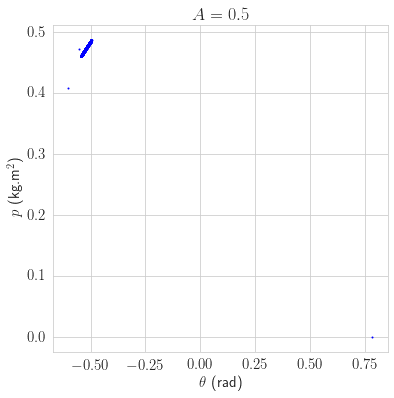

In [111]:
theta1=normaliza_angulo(zsc1)
p=zsc1[:,1]
traca_poincare(theta1,p,t,W,0.5)

Já para a amplitude de $A=1.2$ observamos comportamento caótico:

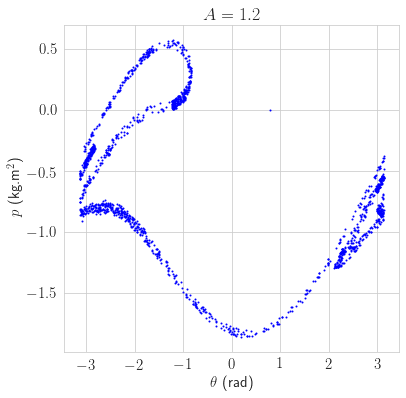

In [112]:
# situação com caos
theta=normaliza_angulo(zc1)
p=zc1[:,1]
traca_poincare(theta,p,t,W,1.2)

# Diagrama de Bifurcação

* A duplicação de períodos começa a ocorrer na transição de regime regular para caótico.
* Usa-se a mesma ideia de verificar um subespaço do espaço de fase em pontos em sincronia com a frequência de excitação.
* Podemos verificar isto em um diagrama, conhecido como diagrama de bifurcação, onde no fundo armazenamos para cada variável de controle os pontos encontrados em regime estacionário.
* É um processo bem demorado que exige muitas simulações.
* A seguir mostramos isto para vários valores da amplitude de controle

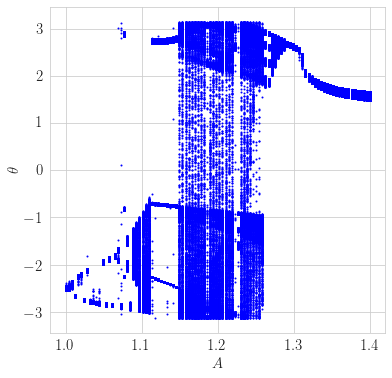

In [117]:
A =np.linspace(1,1.4,100) # amplitudes para testar
ndiscard = 900;
plt.figure(figsize=(6,6))
for a in A:
    z=odeint(pendulofor,z02,t,args=(l,m,g,omega,alpha,a,W))
    theta = normaliza_angulo(z) # ajusta theta entre -pi e pi
    I = estrobo(t,W)
    theta_regime = theta[I&(np.arange(N)>ndiscard)]
    plt.scatter(a*np.ones_like(theta_regime),theta_regime,s=1,color = 'b')
    plt.ylabel(r"$\theta$" )
    plt.xlabel("$A$");
    plt.savefig('bifurca_map.pdf')
plt.show()